In [1]:
# Import required Python libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load 'X_train.csv, X_test.csv, y_train.csv, y_test.csv'
X_train = pd.read_csv('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/X_train.csv', index_col=0)
X_test = pd.read_csv('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/X_test.csv', index_col=0)
y_train = pd.read_csv('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/y_train.csv', index_col=0)
y_test = pd.read_csv('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/y_test.csv', index_col=0)

In [3]:
# Check loaded variables
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
167,0.676485,0.500221,0.653405,-0.256110,0.936506,-0.087173,-0.658681,0.953090,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
12412,0.676485,-0.473621,0.283204,-0.242083,-0.915427,-0.087173,1.985000,-1.600298,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
7691,0.676485,0.175607,0.119880,-0.146959,0.936506,-0.087173,-0.658681,0.238141,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
12460,-1.473959,-0.473621,0.196098,6.418588,0.936506,-0.087173,0.177355,1.157361,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
9099,0.676485,-0.473621,0.032774,6.050501,-0.915427,-0.087173,-0.658681,0.272187,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.398737,-0.798235,-1.175824,-0.197804,-0.915427,-0.087173,-0.658681,-0.817259,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
21575,-0.398737,0.500221,1.096558,-0.243966,0.936506,-0.087173,-0.658681,1.463768,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
5390,-0.398737,0.500221,0.043662,-0.249326,0.936506,-0.087173,-0.658681,1.123316,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
860,-2.549182,-1.772078,-1.850897,-0.002583,-0.915427,-0.087173,-0.658681,-0.272536,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,8.907622,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006


In [4]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
735,0.676485,0.175607,-0.010779,-0.150025,0.936506,-0.087173,-0.658681,0.510503,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
2830,1.751707,1.149449,0.892947,-0.202247,-0.915427,-0.087173,1.759044,0.204096,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
4106,0.676485,0.500221,1.840227,-0.101739,0.936506,-0.087173,-0.658681,0.885000,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
16218,-0.398737,1.798677,2.700400,-0.012047,0.936506,-0.087173,-0.658681,0.646684,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
19964,-0.398737,0.500221,0.511858,-0.234937,0.936506,-0.087173,-0.658681,1.123316,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,-0.398737,0.500221,0.141657,-0.195728,0.936506,-0.087173,-0.658681,0.476458,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
14393,-0.398737,-0.149007,-0.293874,-0.256086,-0.915427,-0.087173,1.216751,-2.213112,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
6899,-0.398737,-1.447464,-1.012500,-0.200557,-0.915427,-0.087173,-0.658681,-0.578943,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
85,-0.398737,-0.798235,0.065439,-0.277815,0.936506,-0.087173,-0.116388,-1.566253,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006


In [5]:
y_train

,price
167,807100.0
12412,570000.0
7691,320000.0
12460,649000.0
9099,568000.0
...,...
11964,378000.0
21575,399950.0
5390,575000.0
860,245000.0


In [6]:
y_test

,price
735,365000.0
2830,865000.0
4106,1038000.0
16218,1490000.0
19964,711000.0
...,...
12606,412000.0
14393,760000.0
6899,410500.0
85,940000.0


In [7]:
# Check shape of variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15129, 97)
(15129, 1)
(6484, 97)
(6484, 1)


## Regression Modeling

### Initial Model Comparison

In [8]:
# Instantiate models

# Simple Linear Regression (sqft_living vs. price)
lr1 = LinearRegression()

# Multiple Linear Regression
lr2 = LinearRegression()

# Ridge Regression
ridge = Ridge()

# Random Forest Regression
rf = RandomForestRegressor()

### Cross validate training data for each model

In [9]:
# Cross Validation
scoring = 'neg_root_mean_squared_error'
score_lr1 = cross_validate(lr1, np.array(X_train['sqft_living']).reshape(-1,1), y_train, cv=10, scoring=scoring, return_estimator=True)
score_lr2 = cross_validate(lr2, X_train, y_train, cv=10, scoring=scoring, return_estimator=True)
score_ridge = cross_validate(ridge, X_train, y_train, cv=10, scoring=scoring, return_estimator=True)
score_rf = cross_validate(rf, X_train, np.ravel(y_train), cv=10, scoring=scoring, return_estimator=True)

In [10]:
# Cross validation model scores
print('Simple Linear Regression Score:  ', round(score_lr1['test_score'].mean()))
print('Multiple Linear Regression Score:', round(score_lr2['test_score'].mean()))
print('Ridge Regression Score:          ', round(score_ridge['test_score'].mean()))
print('Random Forest Regression Score:  ', round(score_rf['test_score'].mean()))

Simple Linear Regression Score:   -255984
Multiple Linear Regression Score: -148509
Ridge Regression Score:           -148506
Random Forest Regression Score:   -148539


**When comparing training set cross validation scores, simple linear regression performs the worst, while multiple linear regression, ridge regression, and random forest regression perform much better and similar to one another.**

### Simple Linear Model

**sqft_living is the feature with the highest correlation with price. A simple linear regression model of these two variables will be used as a baseline model.**

In [11]:
# Fit simple linear regression model (sqft_living vs. price)
lr1.fit(np.array(X_train['sqft_living']).reshape(-1,1), y_train)

# Generate predictions
y_pred_lr1 = lr1.predict(np.array(X_test['sqft_living']).reshape(-1,1))

In [12]:
# Print R2 score and root mean square errors for cross validation and test set
r2_score_lr1 = round(r2_score(y_test, y_pred_lr1), 8)
rmse_test_score_lr1 = round(mean_squared_error(y_test, y_pred_lr1, squared=False))
rmse_train_score_lr1 = round(-score_lr1["test_score"].mean())

print("Test set R2 score:          ", r2_score_lr1)
print("Test set RMSE:              ", rmse_test_score_lr1)
print("Mean cross validation RMSE: ", rmse_train_score_lr1)

Test set R2 score:           0.48388319
Test set RMSE:               272965
Mean cross validation RMSE:  255984


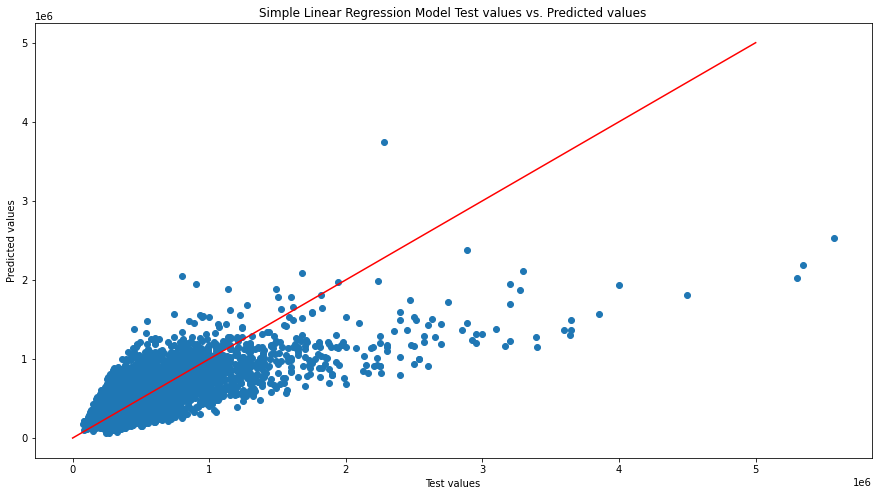

In [13]:
# Plot predictions
fig, ax = plt.subplots(figsize=(15,8))
_ = plt.scatter(y_test, y_pred_lr1)

# Add a line for perfect correlation
plt.plot([x for x in range(0,5000000)],[x for x in range(0,5000000)], color='red')

# Add labels and title
_ = plt.xlabel('Test values')
_ = plt.ylabel('Predicted values')
_ = plt.title('Simple Linear Regression Model Test values vs. Predicted values')

**The fit of this model is not exceptional. More features are needed for better prediction.**

### Multiple Linear Regression Model

**The remaining models will be regressed on the following features against price:**

In [14]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_basement', 'yr_built', 'renovated', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059'

In [15]:
# Fit multiple linear regression model
lr2.fit(X_train, y_train)

# Generate predictions
y_pred_lr2 = lr2.predict(X_test)

In [16]:
# Print R2 score and root mean square errors for cross validation and test set
r2_score_lr2 = round(r2_score(y_test, y_pred_lr2), 8)
rmse_test_score_lr2 = round(mean_squared_error(y_test, y_pred_lr2, squared=False))
rmse_train_score_lr2 = round(-score_lr2["test_score"].mean())

print("Test set R2 score:          ", r2_score_lr2)
print("Test set RMSE:              ", rmse_test_score_lr2)
print("Mean cross validation RMSE: ", rmse_train_score_lr2)

Test set R2 score:           0.83290838
Test set RMSE:               155314
Mean cross validation RMSE:  148509


**The R2 score and root mean square errors are improved significantly from the simple linear model.**

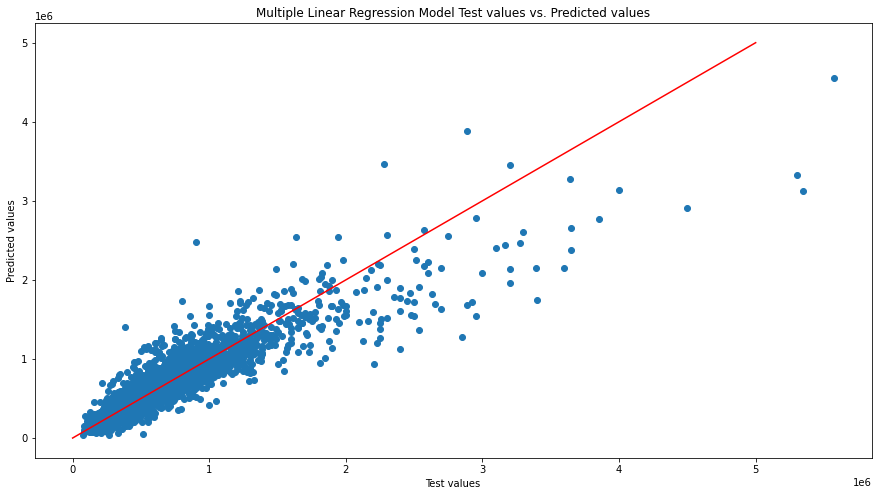

In [17]:
# Plot predictions
fig, ax = plt.subplots(figsize=(15,8))
_ = plt.scatter(y_test, y_pred_lr2)

# Add a line for perfect correlation
plt.plot([x for x in range(0,5000000)],[x for x in range(0,5000000)], color='red')

# Add labels and title
_ = plt.xlabel('Test values')
_ = plt.ylabel('Predicted values')
_ = plt.title('Multiple Linear Regression Model Test values vs. Predicted values')

**The multiple linear regression model predictions are much better than the simple linear regression model. The best performance of the model is at lower values of the target variable, where most of the data is clustered.**  

### Ridge Regression Model

In [18]:
# Fit ridge regression model
ridge.fit(X_train, y_train)

# Generate predictions
y_pred_ridge = ridge.predict(X_test)

In [19]:
# Print R2 score and root mean square errors for cross validation and test set
r2_score_ridge = round(r2_score(y_test, y_pred_ridge), 8)
rmse_test_score_ridge = round(mean_squared_error(y_test, y_pred_ridge, squared=False))
rmse_train_score_ridge = round(-score_ridge["test_score"].mean())

print("Test set R2 score:          ", r2_score_ridge)
print("Test set RMSE:              ", rmse_test_score_ridge)
print("Mean cross validation RMSE: ", rmse_train_score_ridge)

Test set R2 score:           0.83290777
Test set RMSE:               155314
Mean cross validation RMSE:  148506


**The ridge regression model performs nearly identically to the multiple linear regression model. Perhaps hyperparameter tuning will adjust the performance.**

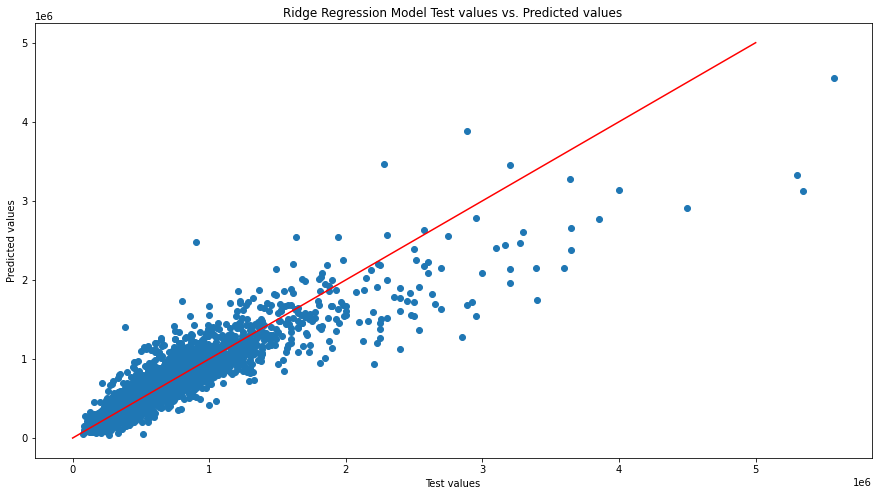

In [20]:
# Plot predictions
fig, ax = plt.subplots(figsize=(15,8))
_ = plt.scatter(y_test, y_pred_ridge)

# Add a line for perfect correlation
plt.plot([x for x in range(0,5000000)],[x for x in range(0,5000000)], color='red')

# Add labels and title
_ = plt.xlabel('Test values')
_ = plt.ylabel('Predicted values')
_ = plt.title('Ridge Regression Model Test values vs. Predicted values')

### Random Forest Regression Model

In [21]:
# Fit random forest regression model
rf.fit(X_train, np.ravel(y_train))

# Generate predictions
y_pred_rf = rf.predict(X_test)

In [22]:
# Print R2 score and root mean square errors for cross validation and test set
r2_score_rf = round(r2_score(y_test, y_pred_rf), 8)
rmse_test_score_rf = round(mean_squared_error(y_test, y_pred_rf, squared=False))
rmse_train_score_rf = round(-score_rf["test_score"].mean())

print("Test set R2 score:          ", r2_score_rf)
print("Test set RMSE:              ", rmse_test_score_rf)
print("Mean cross validation RMSE: ", rmse_train_score_rf)

Test set R2 score:           0.80106538
Test set RMSE:               169468
Mean cross validation RMSE:  148539


**The random forest regression model is worse at predicting the test set values than the multiple linear regression and ridge regression model, but it performs much better than simple linear regression.**

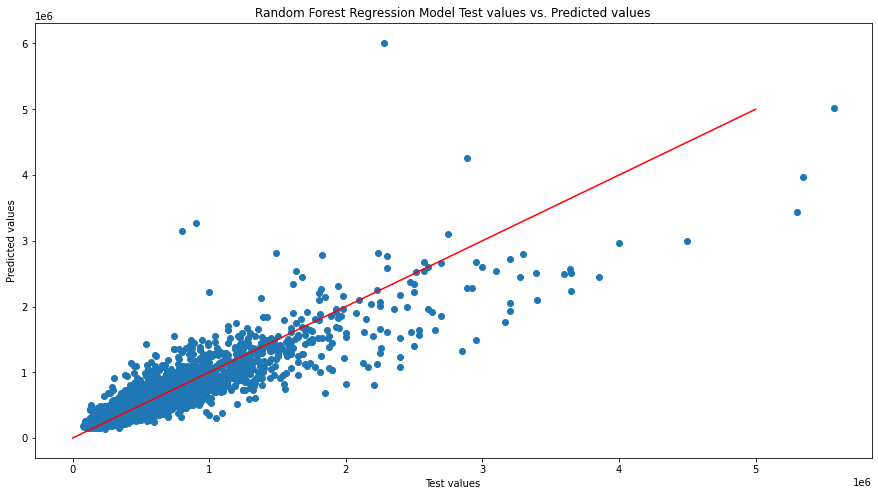

In [23]:
# Plot predictions
fig, ax = plt.subplots(figsize=(15,8))
_ = plt.scatter(y_test, y_pred_rf)

# Add a line for perfect correlation
plt.plot([x for x in range(0,5000000)],[x for x in range(0,5000000)], color='red')

# Add labels and title
_ = plt.xlabel('Test values')
_ = plt.ylabel('Predicted values')
_ = plt.title('Random Forest Regression Model Test values vs. Predicted values')

## Hyperparameter Tuning

### Ridge Regression Hyperparameter Tuning

In [24]:
# Reinstantiate the model and set hyperparameter grid values to search
ridge_tune = Ridge()

param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]
}

In [25]:
# Create GridSearchCV object with parameter grid and 10-fold cross validation
grid = GridSearchCV(ridge_tune, param, scoring=scoring, n_jobs=-1, cv=10)

In [26]:
# Fit GridSearchCV to training data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_root_mean_squared_error')

In [27]:
# Summarize result
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)

Best Score: -148501.36358194338
Best Hyperparameters: {'alpha': 9, 'solver': 'cholesky'}


In [28]:
# Reinstantiate the model with optimal hyperparameters
ridge_tune = Ridge(alpha=grid.best_params_['alpha'], solver=grid.best_params_['solver'])

In [29]:
# Cross validate model
score_ridge_tune = cross_validate(ridge_tune, X_train, y_train, cv=10, scoring=scoring, return_estimator=True)

In [30]:
# Fit hyperparameter tuned ridge regression model
ridge_tune.fit(X_train, y_train)

# Generate predictions
y_pred_ridge_tune = ridge_tune.predict(X_test)

In [31]:
# Print R2 score and root mean square errors for cross validation and test set
r2_score_ridge_tune = round(r2_score(y_test, y_pred_ridge_tune), 8)
rmse_test_score_ridge_tune = round(mean_squared_error(y_test, y_pred_ridge_tune, squared=False))
rmse_train_score_ridge_tune = round(-score_ridge_tune["test_score"].mean())

print("Test set R2 score:          ", r2_score_ridge_tune)
print("Test set RMSE:              ", rmse_test_score_ridge_tune)
print("Mean cross validation RMSE: ", rmse_train_score_ridge_tune)

Test set R2 score:           0.83289534
Test set RMSE:               155320
Mean cross validation RMSE:  148501


### Random Forest Regression Hyperparameter Tuning

In [32]:
# Reinstantiate the model and set hyperparameter grid values to search
rf_tune = RandomForestRegressor(random_state=1, n_jobs=-1)

param = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_features': ['sqrt','log2'],
    'max_depth' : [15,16,17,18,19,20]
}

In [33]:
# Create GridSearchCV object with parameter grid and 10-fold cross validation
grid = GridSearchCV(rf_tune, param_grid=param, scoring=scoring, cv=5, n_jobs=-1)

In [34]:
# Fit GridSearchCV to training data
grid.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             scoring='neg_root_mean_squared_error')

In [35]:
# Summarize result
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)

Best Score: -168401.2023207345
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 600}


In [36]:
# Reinstantiate the model with optimal hyperparameters
rf_tune = RandomForestRegressor(max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'], n_estimators = grid.best_params_['n_estimators'], random_state=1, n_jobs=-1)

In [37]:
# Cross validate model
score_rf_tune = cross_validate(rf, X_train, np.ravel(y_train), cv=10, scoring=scoring, return_estimator=True)

In [38]:
# Fit hyperparameter tuned random forest regression model
rf_tune.fit(X_train, np.ravel(y_train))

# Generate predictions
y_pred_rf_tune = rf_tune.predict(X_test)

In [39]:
# Print R2 score and root mean square errors for cross validation and test set
r2_score_rf_tune = round(r2_score(y_test, y_pred_rf_tune), 8)
rmse_test_score_rf_tune = round(mean_squared_error(y_test, y_pred_rf_tune, squared=False))
rmse_train_score_rf_tune = round(-score_rf_tune["test_score"].mean())

print("Test set R2 score:          ", r2_score_rf_tune)
print("Test set RMSE:              ", rmse_test_score_rf_tune)
print("Mean cross validation RMSE: ", rmse_train_score_rf_tune)

Test set R2 score:           0.78793758
Test set RMSE:               174971
Mean cross validation RMSE:  148866


**The random forest regression model tuning has yielded a slightly better performance in cross validation, but the performance on the test set is getting worse compared to the default settings. Since the random forest regression model does not perform as well with the test data compared to ridge and multiple linear regression, additional tuning efforts will likely not be productive.**

## Summary Table

In [40]:
# Make lists of model labels and scoring metrics
model_list = ['Simple Linear Regression','Multiple Linear Regression','Ridge Regression',
              'Ridge Regression (tuned)', 'Random Forest Regression', 'Random Forest Regression (tuned)']
scores_train = [rmse_train_score_lr1, rmse_train_score_lr2, rmse_train_score_ridge,
                rmse_train_score_ridge_tune, rmse_train_score_rf, rmse_train_score_rf_tune]
scores_test = [rmse_test_score_lr1, rmse_test_score_lr2, rmse_test_score_ridge,
                rmse_test_score_ridge_tune, rmse_test_score_rf, rmse_test_score_rf_tune]
r2_test = [r2_score_lr1, r2_score_lr2, r2_score_ridge, r2_score_ridge_tune, r2_score_rf, r2_score_rf_tune]

In [41]:
# Create DataFrame of scoring metrics
score_table = pd.DataFrame(list(zip(scores_train, scores_test, r2_test)),
                           columns =['Training Set Cross Validation RMSE', 'Test Set RMSE', 'Test Set R2 Score'], index=model_list) 

In [42]:
# View scoring metrics table
score_table

,Training Set Cross Validation RMSE,Test Set RMSE,Test Set R2 Score
Simple Linear Regression,255984,272965,0.483883
Multiple Linear Regression,148509,155314,0.832908
Ridge Regression,148506,155314,0.832908
Ridge Regression (tuned),148501,155320,0.832895
Random Forest Regression,148539,169468,0.801065
Random Forest Regression (tuned),148866,174971,0.787938


## Conclusions

**Multiple linear regression and ridge regression (alpha=1.0) perform well at predicting the test data. These are the best models and are a substantial improvement over simple linear regression.**

**Hyperparameter tuning was explored, but it yielded negligible improvement to the default model settings. Random forest regression also performs well, but it does not generalize to the test data as well as multiple linear regression.**